Low Pass Filter Design

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp

In [9]:
# window functions
def triangular(n,N):
    x= np.empty(N)
    x[n<(N)//2] = 2*n[n<(N)//2]/(N-1)
    x[n>=(N)//2] = 2-2*n[n>=(N)//2]/(N-1)
    return x

def rectangular(n,N):
    x= np.ones(N)
    return x

def hanning(n,N):
    x= 0.5-0.5*np.cos(2*np.pi*n/(N-1))
    return x

def hamming(n,N):
    x= 0.54-0.46*np.cos(2*np.pi*n/(N-1))
    return x


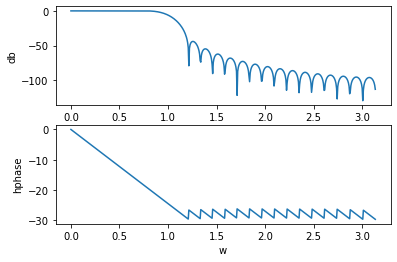

In [14]:
def mfreq(b):
    w,h = sp.freqz(b,1) #w is the frequency and h is the frequency response
    db = 20*np.log10(abs(h))
    plt.subplot(2,1,1)
    plt.xlabel('w')
    plt.ylabel('db')
    plt.plot(w,db)
    plt.subplot(2,1,2)
    hphase = np.unwrap(np.arctan2(np.imag(h),np.real(h)))
    plt.xlabel('w')
    plt.ylabel('hphase')
    plt.plot(w,hphase)
    plt.show()
def lpf(N, wc, win):
    a=(N-1)/2 # delay 
    print("Cutoff Frequency:",wc)
    h=[wc/np.pi if i == a else np.sin(wc*(i-a))/((i-a)*np.pi) for i in
       np.arange(0, N) ]
    windows = [hanning, hamming, triangular, rectangular]
    h_ = h*windows[win-1](np.arange(0, N), N)
    mfreq(h_)
    
N = int(input("Enter N: "))
wc = float(input("Enter wc: "))
win = int(input("Choose window\n1. Hanning\n2. Hamming\n3. Triangular\n4.Rectangular\n"))

lpf(N, wc, win)
